<a href="https://colab.research.google.com/github/jabir-al-nahian/sentiment-analysis-ml/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
path ='/content/drive/MyDrive/Shorna/'
stopwords_list = path+'bangla_stopwords.txt'
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

#Dataset Preparation

In [ ]:
df = pd.read_csv(path+'data.csv',encoding='UTF-8')

In [ ]:
df

,comment,sentiment
0,ভালোই তো সিনামার সাথে পাহাড় পর্বত দেখা ফ্রি কর...,criticism
1,কোনো কাহিনী খুঁজে না পাওয়া আমার মন,sad
2,বাপ্পি এই ছবির জন্য যথাযথ,motivation
3,সেরা অভিনেতা বাপ্পি চৌধুরী,happy
4,আগের দিনের মুভি গুলাই সেরা ছিল,motivation
...,...,...
2001,দেখবো দেখবো এত দিন দেখি নি আজ দেখে অনেক ক্লান্...,sad
2002,কোটি কোটি বক্তদের চোখের জল এসেছ এই মনপুরা মুভি...,compliment
2003,ছবিটাতে পুরো সময় জুড়েই ভালো লাগা ভালোবাসা ছিলো,happy
2004,"অসহায়দের সবাই প্রয়োজনে ব্যাবহার করে, প্রয়োজন শ...",sad


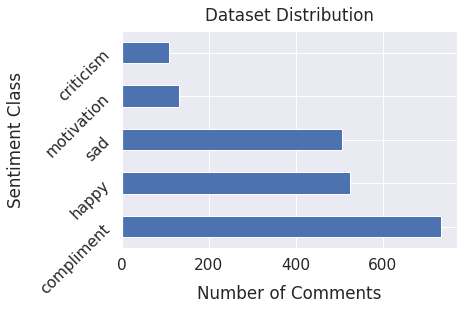

In [ ]:
sns.set(font_scale=1.4)
df['sentiment'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

In [ ]:
# print some unprocessed reviews
sample_df = [10,100,150,200,220,330,400,550]
for i in sample_df:
      print(df.comment[i],'\n','Sentiment:-- ',df.sentiment[i],'\n')

বাপ্পি ভাই এরকম সিনেমায় অভিনয় করবে,আমি জীবনে কল্পনাও করিনি এরকম বাজে সিনেমায় অন্তত বাপ্পিকে মানাচ্ছে না বাপ্পি ভাই আশা করি নেক্স টাইম এরকম ছবিতে সাইন করবেন না 
 Sentiment:--  motivation 

শাকিব খানের এই ছবি গুলো অনেক ভালো লাগে 
 Sentiment:--  happy 

ছবিটা আমার মন ছুয়ে গেছে,আরফিন শূভ ভাইয়ের পুরস্কার পাওয়া উচিত বলে আমি মনে করি 
 Sentiment:--  happy 

আমি কি লিখব,হারিয়ে ফেলেছি সব।তবে খাবারের অভাবে কেমন যন্ত্রণা পায় সেটা 
দেখলাম।আশা রাখি দুনিয়াতে কেউ যেন খাবারের অভাবে মারা না যায়,,,,,আমার দেখা
 সেরা ছ 
 Sentiment:--  happy 

হে আল্লাহ তুমি আমার চোখ খুলে দিয়েছ আমি আর কখনোই ভাত/খাবার অপচয় করবনা 
 Sentiment:--  sad 

আমি মনে করি এই এশিয়ার মধ্যে সবদিকেই সালমান এগিয়ে  
 Sentiment:--  compliment 

এসব ছবি যতো দেখি ততোটাই ভালো লাগে 
 Sentiment:--  compliment 

সত্যিই একজন অভিনেতা মান্না ভাই যার অভিনয় দেখলে চোখের পানি ধরে রাখা যায় না 
 Sentiment:--  sad 



#Data Cleaning

In [ ]:
# Data cleaning function
def process_comments(comment):
    comment = re.sub('[^\u0980-\u09FF]',' ',str(comment)) #removing unnecessary punctuation
    return comment

In [ ]:
# Apply the function into the dataframe
df['cleaned'] = df['comment'].apply(process_comments)

# print some cleaned reviews from the dataset
sample_df = [10,100,150,200,220,330,400,550]
for i in sample_df:
     print('Original:\n',df.comment[i],'\nCleaned:\n',
           df.cleaned[i],'\n','Sentiment:-- ',df.sentiment[i],'\n')

Original:
 বাপ্পি ভাই এরকম সিনেমায় অভিনয় করবে,আমি জীবনে কল্পনাও করিনি এরকম বাজে সিনেমায় অন্তত বাপ্পিকে মানাচ্ছে না বাপ্পি ভাই আশা করি নেক্স টাইম এরকম ছবিতে সাইন করবেন না 
Cleaned:
 বাপ্পি ভাই এরকম সিনেমায় অভিনয় করবে আমি জীবনে কল্পনাও করিনি এরকম বাজে সিনেমায় অন্তত বাপ্পিকে মানাচ্ছে না বাপ্পি ভাই আশা করি নেক্স টাইম এরকম ছবিতে সাইন করবেন না 
 Sentiment:--  motivation 

Original:
 শাকিব খানের এই ছবি গুলো অনেক ভালো লাগে 
Cleaned:
 শাকিব খানের এই ছবি গুলো অনেক ভালো লাগে 
 Sentiment:--  happy 

Original:
 ছবিটা আমার মন ছুয়ে গেছে,আরফিন শূভ ভাইয়ের পুরস্কার পাওয়া উচিত বলে আমি মনে করি 
Cleaned:
 ছবিটা আমার মন ছুয়ে গেছে আরফিন শূভ ভাইয়ের পুরস্কার পাওয়া উচিত বলে আমি মনে করি 
 Sentiment:--  happy 

Original:
 আমি কি লিখব,হারিয়ে ফেলেছি সব।তবে খাবারের অভাবে কেমন যন্ত্রণা পায় সেটা 
দেখলাম।আশা রাখি দুনিয়াতে কেউ যেন খাবারের অভাবে মারা না যায়,,,,,আমার দেখা
 সেরা ছ 
Cleaned:
 আমি কি লিখব হারিয়ে ফেলেছি সব তবে খাবারের অভাবে কেমন যন্ত্রণা পায় সেটা  দেখলাম আশা রাখি দুনিয়াতে কেউ যেন খাবারের অভাবে মারা না যায়  

##Remove Low lenght data

In [ ]:
# Length of each Reveiws
df['length'] = df['cleaned'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = df.loc[df.length>2]
dataset = df.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(df)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 0 Small Reviews 
Total Reviews: 2006


#Dataset Summary

In [ ]:
def data_summary(dataset):

    """
    This function will print the summary of the reviews and words distribution in the dataset.

    Args:
        dataset: list of cleaned sentences

    Returns:
        Number of documnets per class: int
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.sentiment.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.sentiment==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.sentiment==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.sentiment==label].cleaned))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)



Class Name :  compliment
Number of Documents:734
Number of Words:7868
Number of Unique Words:2075
Most Frequent Words:

ছবি	163
অভিনয়	138
অসাধারণ	122
এই	122
সুন্দর	108
অনেক	104
মুভি	103
না	95
ভালো	90
আর	80

Class Name :  happy
Number of Documents:524
Number of Words:5087
Number of Unique Words:1560
Most Frequent Words:

ভালো	121
অনেক	118
ছবি	112
আমার	108
এই	92
মুভি	60
সুন্দর	54
লাগে	53
খুব	51
অসাধারণ	49

Class Name :  sad
Number of Documents:506
Number of Words:6686
Number of Unique Words:1957
Most Frequent Words:

না	159
এই	117
পানি	100
আর	89
দেখে	84
অনেক	81
মুভি	74
চোখের	71
ছবি	69
খুব	53

Class Name :  motivation
Number of Documents:132
Number of Words:1609
Number of Unique Words:768
Most Frequent Words:

ছবি	30
এই	27
অনেক	25
মুভি	22
না	21
ভালো	20
জন্য	16
চাই	16
আমার	16
কিছু	16

Class Name :  criticism
Number of Documents:108
Number of Words:1076
Number of Unique Words:573
Most Frequent Words:

না	23
ছবি	23
মুভি	20
আর	20
ভালো	18
কি	14
নায়ক	12
কে	12
সাথে	11
সিনেমা	10
Total Number of 

#Dataset Summary Visualization

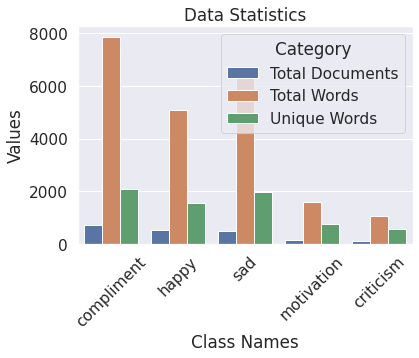

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

#Comment Lenght Distribution

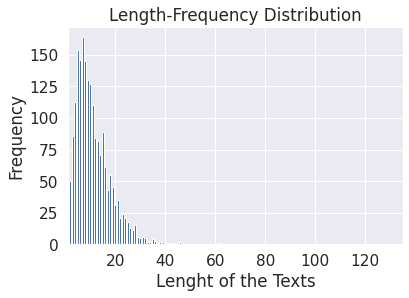

Maximum Length of a review: 62
Minimum Length of a review: 1
Average Length of a reviews: 11.0


In [ ]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

# Take only Positive and Negative Class for Model Building

##Lable Encoding and Dataset Splitting

In [ ]:
                                      #==================================================
                                       ################# Label Encoding Function #########
                                       #==================================================

def label_encoding(sentiment,bool):
    """
    This function will return the encoded labels in array format.

    Args:
        sentiment: series of class names(str)
        bool: boolean (True or False)

    Returns:
        labels: numpy array
    """
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels



                           #===========================================================
                           ################# Dataset Splitting Function ###############
                           #===========================================================

def dataset_split(feature_space,sentiment):
    """
    This function will return the splitted (80%-20%) feature vector .

    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array)

    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array)
        y_test : testing encoded labels (array)
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])

    return X_train,X_test,y_train,y_test


In [ ]:
dataset.cleaned = dataset.cleaned.apply(lambda x:x.replace('\n',' '))

#**Model Building Using Machine Learning**

##Feature Extraction Using TF-IDF

In [ ]:
                                            #======================================
                                            ##### Unigram Tf-idf value calculation
                                            #======================================

def calc_gram_tfidf(reviews,gram):
    """
    This function will return the tf-idf value of the respective gram features .

    Args:
        reviews: a list of cleaned reviews

    Returns:
        tfidf: a instance of TfidfVectorizer
        X : Unigram Feature Vector (sparse matrix)
    """
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split())
    X = tfidf.fit_transform(reviews)

    return tfidf,X


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve


In [ ]:
                                              #============================================
                                              #########  Classifiers Defination  #########
                                              #============================================
def ml_models_defination():
    """
    This function consists the models defination for All gram Features

    Retuns:
        ml_models: list of models
        model_names: list of model_names

    """

    lr_model = LogisticRegression(random_state = 123)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']
    #model_names = ['Logistic Regression']
    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    #ml_models = [lr_model]
    return ml_models,model_names


                                          #============================================
                                           ####### Model Evaluation Function ############
                                           #=============================================

def model_performace(model,X_train,X_test,y_train,y_test):
    """
    This function will return the performance parameter values of each ML models.
    Performance parameters are Accuracy, F1-Score, Precision, Recall.

    Args:
        model: a ML model instance
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array)
        y_test : testing encoded labels (array)

    Returns:
        my_dict: a dictionary of all the parameters for each models
    """
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100
    my_dict['Precision'] = round(precision_score(y_test, pred_y),4)*100
    my_dict['Recall'] = round(recall_score(y_test, pred_y),4)*100
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y),4)*100

    return my_dict

                                        #========================================
                                        #### Model Performane into Dataframe #####
                                        #=========================================

def performance_table(performance_dict):
    """
    This function will create a dataframe of all the performance parameters.

    Args:
        performance_dict: a dictionary of all the parameters for each models

    Returns:
        performance_df: a dataframe
    """

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df

##Model Training

In [ ]:
## save the performance of the model for each gram feature
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,gram)
    labels = label_encoding(dataset.sentiment,False)
    X_train,X_test,y_train,y_test= dataset_split(feature,labels)
    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    #Save the performance parameter into json file
    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
          json.dump(accuracy, f)

Feature Size :======> 4307

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2006 
	Training		 1805 
	Test			 201


ValueError: ignored

##Performance Table

In [ ]:
# Load all the json files
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")


**Conclusion:**

---



***From this performance table it can be said that the Trigarm feature combination with Multinomial Naive Bayes classifier provides highest accuray and F1-score value.***

## Performance Visualization

In [ ]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  df = pd.melt(table[['Accuracy','F1 Score','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,6))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name')
  ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
  ax.set_ylim([10,80])
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);